In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

# Rock, Paper, Scissors

In [2]:
def regret(a,b):
    '''
    a,b: choice of player A,B
    p: payoff
    return two lists of regret of A,B
    '''
    if a=='r':
        if b=='p':
            return np.array([0,1,2]),np.array([0,0,0])
        elif b=='s':
            return np.array([0,0,0]),np.array([1,2,0])
        else:
            return np.array([0,1,0]),np.array([0,1,0])
        
    if a=='p':
        if b=='s':
            return np.array([2,0,1]),np.array([0,0,0])
        elif b=='r':
            return np.array([0,0,0]),np.array([0,1,2])
        else:
            return np.array([0,0,1]),np.array([0,0,1])
        
    if a=='s':
        if b=='r':
            return np.array([1,2,0]),np.array([0,0,0])
        if b=='p':
            return np.array([0,0,0]),np.array([2,0,1])
        else:
            return np.array([1,0,0]),np.array([1,0,0])

In [3]:
def RPS(initial, N, Memory = True):
    '''
    tol: tolerence
    initial: initial probability distribution 
    '''
    # initial play
    strategy = ['r','p','s']
    R_A = np.zeros(3)  # cumulative regret of A
    R_B = np.zeros(3)  # cumulative regret of B
    Ap = initial
    Bp = initial
    MemoryA = np.zeros((N,3))
    MemoryB = np.zeros((N,3))
        
    for i in range(N):
        MemoryA[i] = np.array(Ap)
        MemoryB[i] = np.array(Bp)
        Sa = random.choices(strategy, weights=Ap)[0]  # return a list, select first element
        Sb = random.choices(strategy, weights=Bp)[0]
        rA, rB = regret(Sa,Sb)
        R_A += rA  
        R_B += rB
        if R_A.any() != 0.:
            Ap = R_A / np.sum(R_A)
        if R_B.any() != 0.:
            Bp = R_B / np.sum(R_B)
    if Memory:   
        return MemoryA, MemoryB
    else:
        return Ap, Bp

In [4]:
M = 100000
p1, p2= RPS([0.4,0.3,0.3],M)
P1, P2 = RPS([1,0,0],M)
print(p1[-1,:],p2[-1,:])
print(P1[-1,:],P2[-1,:])

[0.33362983 0.3331664  0.33320377] [0.3338807 0.3318921 0.3342272]
[0.33447179 0.33264374 0.33288447] [0.33293187 0.33270744 0.33436069]


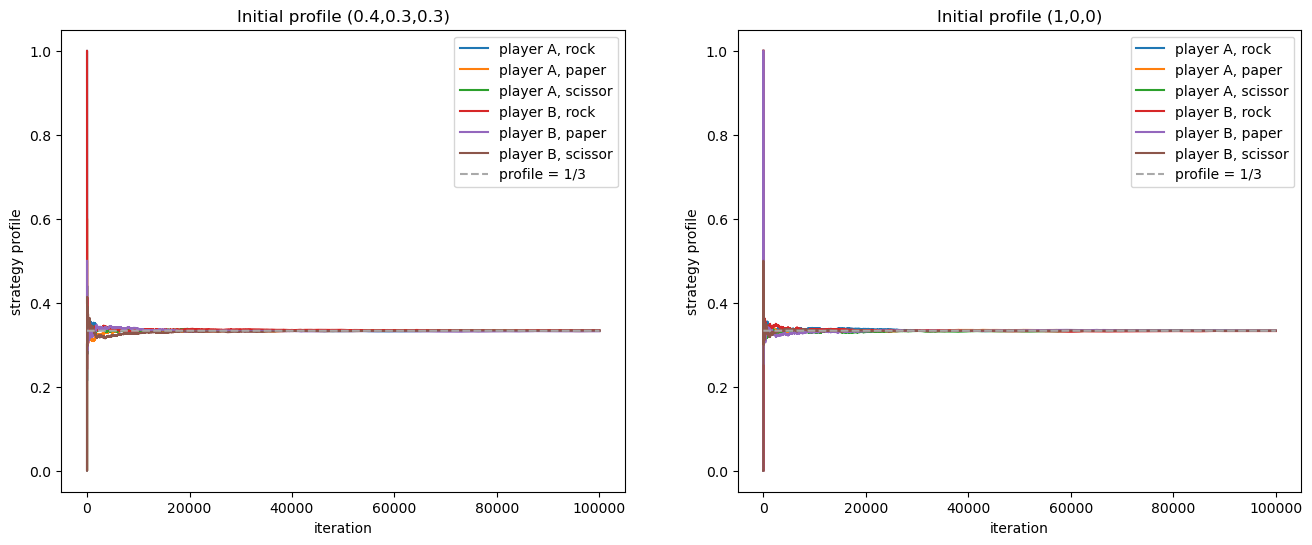

In [159]:
T = np.linspace(0,M-1,M)
Expected = np.zeros(M) + 1/3

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax[0].plot(T, p1[:,0],label='player A, rock')
ax[0].plot(T, p1[:,1],label='player A, paper')
ax[0].plot(T, p1[:,2],label='player A, scissor')
ax[0].plot(T, p2[:,0],label='player B, rock')
ax[0].plot(T, p2[:,1],label='player B, paper')
ax[0].plot(T, p2[:,2],label='player B, scissor')
ax[0].plot(T, Expected, '--',color = 'darkgrey',label='profile = 1/3')
ax[0].set_title('Initial profile (0.4,0.3,0.3)')
ax[0].set_ylabel('strategy profile')
ax[0].set_xlabel('iteration')
ax[0].legend()

ax[1].plot(T, P1[:,0],label='player A, rock')
ax[1].plot(T, P1[:,1],label='player A, paper')
ax[1].plot(T, P1[:,2],label='player A, scissor')
ax[1].plot(T, P2[:,0],label='player B, rock')
ax[1].plot(T, P2[:,1],label='player B, paper')
ax[1].plot(T, P2[:,2],label='player B, scissor')
ax[1].plot(T, Expected,'--',color = 'darkgrey',label='profile = 1/3')
ax[1].set_title('Initial profile (1,0,0)')
ax[1].set_ylabel('strategy profile')
ax[1].set_xlabel('iteration')
ax[1].legend()

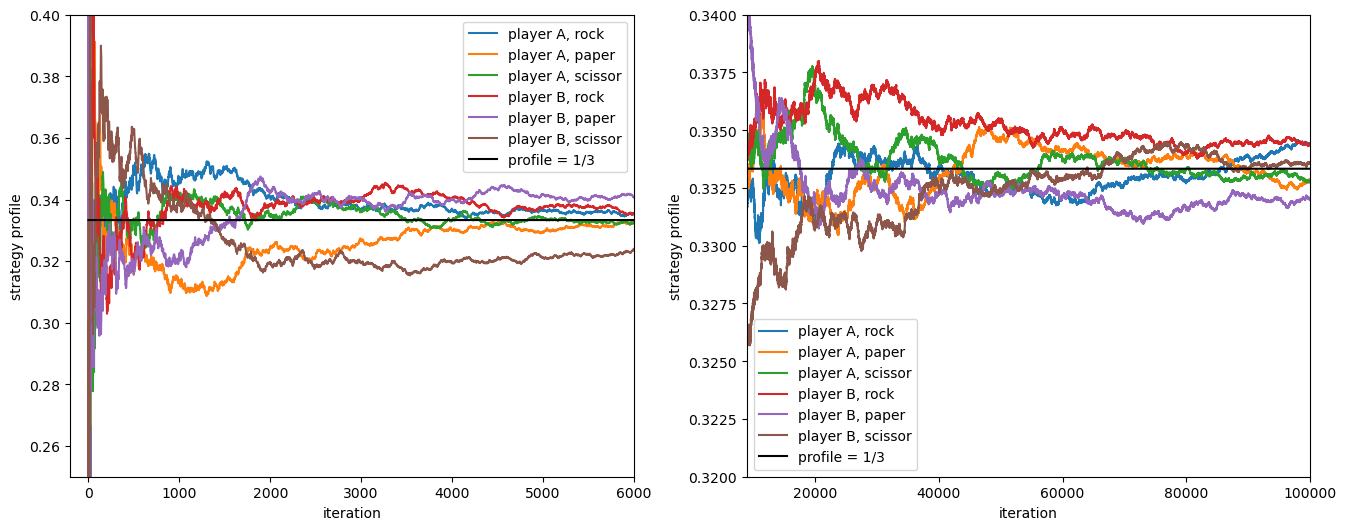

In [160]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

ax[0].plot(T, p1[:,0],label='player A, rock')
ax[0].plot(T, p1[:,1],label='player A, paper')
ax[0].plot(T, p1[:,2],label='player A, scissor')
ax[0].plot(T, p2[:,0],label='player B, rock')
ax[0].plot(T, p2[:,1],label='player B, paper')
ax[0].plot(T, p2[:,2],label='player B, scissor')
ax[0].plot(T, Expected, color = 'black',label='profile = 1/3')
ax[0].set_ylim([0.25,0.4])
ax[0].set_xlim([-200,6000])
ax[0].set_ylabel('strategy profile')
ax[0].set_xlabel('iteration')
ax[0].legend()

ax[1].plot(T, p1[:,0],label='player A, rock')
ax[1].plot(T, p1[:,1],label='player A, paper')
ax[1].plot(T, p1[:,2],label='player A, scissor')
ax[1].plot(T, p2[:,0],label='player B, rock')
ax[1].plot(T, p2[:,1],label='player B, paper')
ax[1].plot(T, p2[:,2],label='player B, scissor')
ax[1].plot(T, Expected, color = 'black',label='profile = 1/3')
ax[1].set_ylim([0.32,0.34])
ax[1].set_xlim([90000,M])
ax[1].set_ylabel('strategy profile')
ax[1].set_xlabel('iteration')
ax[1].legend()

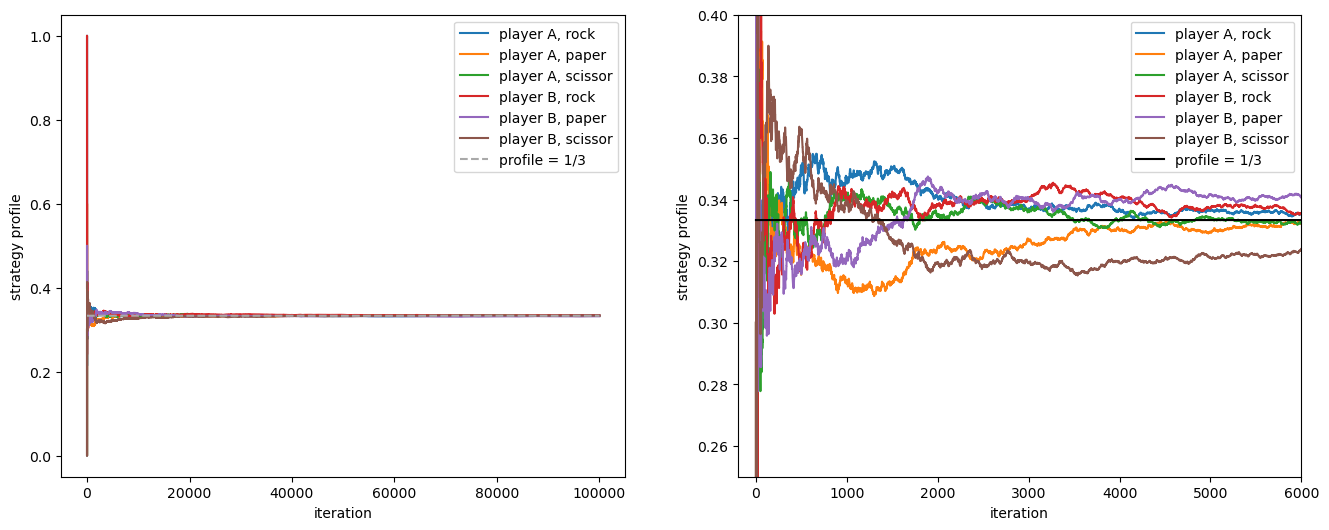

In [185]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax[0].plot(T, p1[:,0],label='player A, rock')
ax[0].plot(T, p1[:,1],label='player A, paper')
ax[0].plot(T, p1[:,2],label='player A, scissor')
ax[0].plot(T, p2[:,0],label='player B, rock')
ax[0].plot(T, p2[:,1],label='player B, paper')
ax[0].plot(T, p2[:,2],label='player B, scissor')
ax[0].plot(T, Expected, '--',color = 'darkgrey',label='profile = 1/3')
ax[0].set_ylabel('strategy profile')
ax[0].set_xlabel('iteration')
ax[0].legend()

ax[1].plot(T, p1[:,0],label='player A, rock')
ax[1].plot(T, p1[:,1],label='player A, paper')
ax[1].plot(T, p1[:,2],label='player A, scissor')
ax[1].plot(T, p2[:,0],label='player B, rock')
ax[1].plot(T, p2[:,1],label='player B, paper')
ax[1].plot(T, p2[:,2],label='player B, scissor')
ax[1].plot(T, Expected, color = 'black',label='profile = 1/3')
ax[1].set_ylim([0.25,0.4])
ax[1].set_xlim([-200,6000])
ax[1].set_ylabel('strategy profile')
ax[1].set_xlabel('iteration')
ax[1].legend()

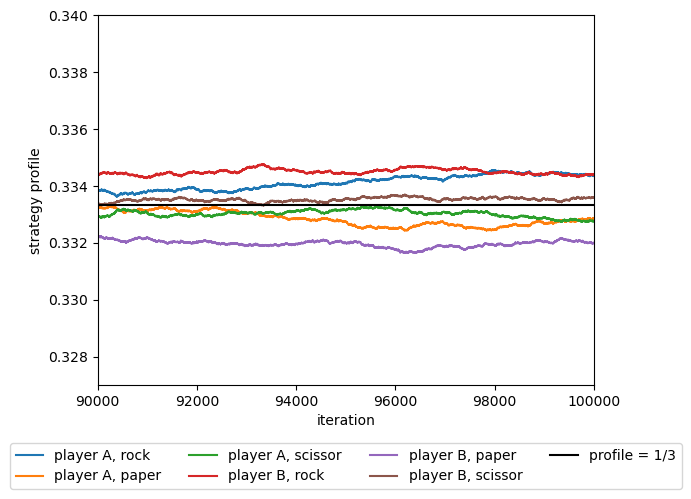

In [189]:
plt.plot(T, p1[:,0],label='player A, rock')
plt.plot(T, p1[:,1],label='player A, paper')
plt.plot(T, p1[:,2],label='player A, scissor')
plt.plot(T, p2[:,0],label='player B, rock')
plt.plot(T, p2[:,1],label='player B, paper')
plt.plot(T, p2[:,2],label='player B, scissor')
plt.plot(T, Expected, color = 'black',label='profile = 1/3')
plt.ylim([0.327,0.34])
plt.xlim([90000,M])
plt.ylabel('strategy profile')
plt.xlabel('iteration')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4)

# Colonel Blotto

In [9]:
Strategy = ['005','050','500',
            '014','041','104','140','401','410',
            '023','032','203','230','302','320',
            '113','131','311',
            '122','212','221']

In [27]:
def CBpayoff(Sa,Sb):
    pa, pb = 0, 0   # initialise payoff 
    for soldier1, soldier2 in zip(Sa,Sb):
        if soldier1 > soldier2:
            pa += 1
            # pb -= 0
        elif soldier1 == soldier2:
            pa += 0.5 # 0.5
            pb += 0.5 # 0.5
        else:
            # pa -= 0
            pb += 1
        
    return pa, pb

In [11]:
def RegretV(sa, sb, n=21):
    '''
    sa, sb: strings of strategy
    strategy: all strategy
    return: two length n vectors, regret of A and regret of B
    '''
    # define
    strategy = ['005','050','500','014','041','104','140','401','410','023','032','203','230','302','320',
                '113','131','311','122','212','221']
    # returns regret vector 
    regretA = np.zeros(n)
    regretB = np.zeros(n)
    # turn string to list
    S_a = [int(x) for x in sa]   
    S_b = [int(x) for x in sb]
    payA, payB = CBpayoff(S_a, S_b)
    if payA > payB:
        for j, b in enumerate(strategy):
            Alter_b = [int(x) for x in b]
            new_pa, new_pb = CBpayoff(S_a, Alter_b)
            if new_pb > payB:
                regretB[j] = new_pb - payB
    elif payB > payA:
        for i, a in enumerate(strategy):
            Alter_a = [int(x) for x in a]
            new_pa, new_pb = CBpayoff(Alter_a, S_b)
            if new_pa > payA:
                regretA[i] = new_pa - payA
    else:
        for i, a in enumerate(strategy):
            Alter_a = [int(x) for x in a]
            new_pa, new_pb = CBpayoff(Alter_a, S_b)
            if new_pa > payA:
                regretA[i] = new_pa - payA
        for j, b in enumerate(strategy):
            Alter_b = [int(x) for x in b]
            new_pa, new_pb = CBpayoff(S_a, Alter_b)
            if new_pb > payB:
                regretB[j] = new_pb - payB
        
    return regretA, regretB

In [12]:
def Blotto(initial, N, Memory = True):
    '''
    tol: tolerence
    initial: initial probability distribution 
    '''
    # initial play
    strategy = ['005','050','500',
            '014','041','104','140','401','410',
            '023','032','203','230','302','320',
            '113','131','311',
            '122','212','221']
    R_A = np.zeros(21)  # cumulative regret of A
    R_B = np.zeros(21)  # cumulative regret of B
    Ap = initial
    Bp = initial
    MemoryA = np.zeros((N,21))
    MemoryB = np.zeros((N,21))
        
    for i in range(0,N,2):
        MemoryA[i] = np.array(Ap)
        MemoryB[i] = np.array(Bp)
        Sa = random.choices(strategy, weights=Ap)[0]  # return a list, select first element
        Sb = random.choices(strategy, weights=Bp)[0]
        rA, rB = RegretV(Sa,Sb)
        R_A += rA  
        R_B += rB
        if R_A.any() != 0.:
            Ap = R_A / np.sum(R_A)
        if R_B.any() != 0.:
            Bp = R_B / np.sum(R_B)
            
        MemoryA[i+1] = np.array(Ap)
        MemoryB[i+1] = np.array(Bp)
        Sa = random.choices(strategy, weights=Ap)[0]  # return a list, select first element
        Sb = random.choices(strategy, weights=Bp)[0]
        rA, rB = RegretV(Sa,Sb)
        R_A += rA  
        R_B += rB
        if R_A.any() != 0.:
            Ap = R_A / np.sum(R_A)
        if R_B.any() != 0.:
            Bp = R_B / np.sum(R_B)
            
    if Memory:   
        return MemoryA, MemoryB
    else:
        return Ap, Bp

In [13]:
m1, m2 = Blotto(np.zeros(21)+1/21, 10000)
fm1 = m1[-1,:]
fm2 = m2[-1,:]
print(fm1,fm2)

[0.0150669  0.01480393 0.01486581 0.04318973 0.04254003 0.0424008
 0.04206048 0.04315879 0.04283394 0.06192281 0.06145874 0.06054606
 0.06043778 0.06164437 0.06025215 0.05434295 0.05386341 0.05425014
 0.05715833 0.05706551 0.05613737] [0.01455292 0.01513078 0.01502433 0.04181873 0.04382603 0.04166667
 0.04251825 0.04340024 0.04245742 0.05965633 0.06111618 0.05935219
 0.06038625 0.06043187 0.06023418 0.05331509 0.05553528 0.0551247
 0.05798358 0.05769465 0.05877433]


In [14]:
# 005
f005 = np.sum(fm1[0:3]+fm2[0:3])/6
f014 = np.sum(fm1[3:9]+fm2[3:9])/12
f023 = np.sum(fm1[9:15]+fm2[9:15])/12
f113 = np.sum(fm1[15:18]+fm2[15:18])/6
f122 = np.sum(fm1[18:]+fm2[18:])/6
print([f005,f014,f023,f113,f122])

[0.014907444626924629, 0.04265592673712321, 0.060619908264188144, 0.054405258997028944, 0.05746895970675705]


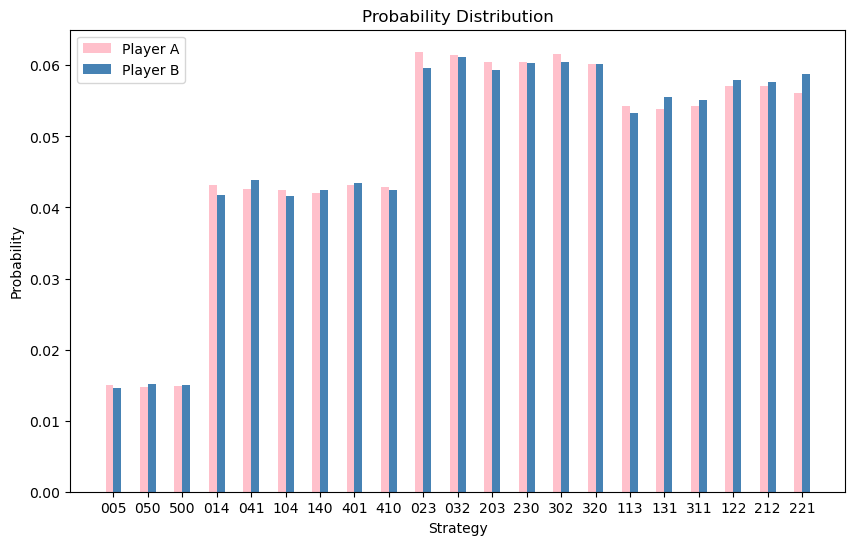

In [15]:
prob_A = fm1.tolist()
prob_B = fm2.tolist()
bar_width = 0.23
num_items = range(len(Strategy))

fig, ax = plt.subplots(figsize=(10,6))
bar1 = ax.bar(np.array(num_items) - bar_width / 2, prob_A, bar_width, label='Player A', color='pink')
bar2 = ax.bar(np.array(num_items) + bar_width / 2, prob_B, bar_width, label='Player B', color='steelblue')

plt.xlabel('Strategy')
plt.ylabel('Probability')
plt.title('Probability Distribution')
ax.set_xticks(num_items)
ax.set_xticklabels(Strategy)  # Set the actual item labels
ax.legend()

plt.show()

C:\Users\xinyu\AppData\Local\Temp\ipykernel_1560\4003987386.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_mapping = {combo: plt.cm.get_cmap('tab10')(i) for i, combo in enumerate(unique_combinations)}


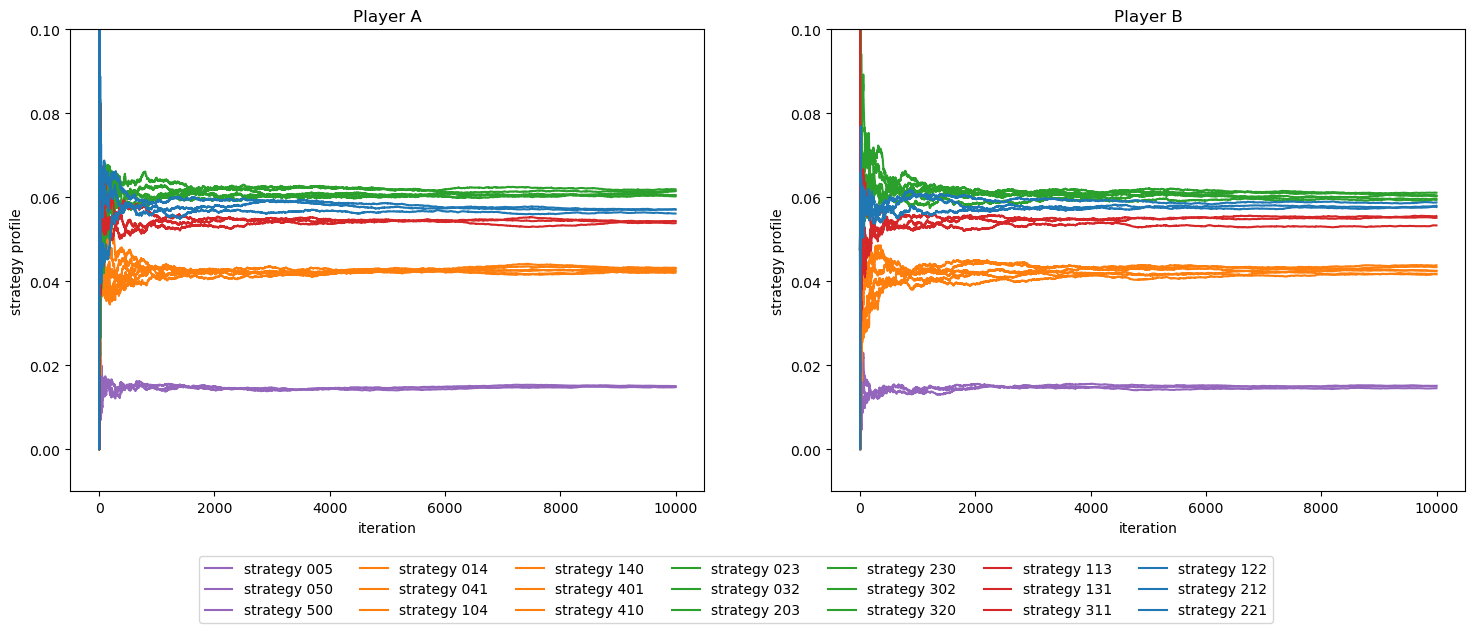

In [25]:
M = 10000
T = np.linspace(0,M-1,M)

# Expected = np.zeros(M) + 1/3
unique_combinations = set(''.join(sorted(s)) for s in Strategy)
color_mapping = {combo: plt.cm.get_cmap('tab10')(i) for i, combo in enumerate(unique_combinations)}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

for i in range(21):
    ax[0].plot(T, m1[:,i],label='strategy %s'%Strategy[i],color=color_mapping[''.join(sorted(Strategy[i]))])
    ax[0].set_title('Player A')
    ax[0].set_ylabel('strategy profile')
    ax[0].set_xlabel('iteration')
    ax[0].set_ylim(-0.01,0.1)
    # ax[0].legend(loc='upper right',bbox_to_anchor=(1.2, 1))

    ax[1].plot(T, m2[:,i],label='strategy %s'%Strategy[i],color=color_mapping[''.join(sorted(Strategy[i]))])
    ax[1].set_title('Player B')
    ax[1].set_ylim(-0.01,0.1)
    ax[1].set_ylabel('strategy profile')
    ax[1].set_xlabel('iteration')
    ax[1].legend(loc='lower center', bbox_to_anchor=(-0.15, -0.3), ncol=7)

# Testing convergence

In [18]:
# def CBpayoff(Sa,Sb):
#     pa, pb = 0, 0   # initialise payoff 
#     for soldier1, soldier2 in zip(Sa,Sb):
#         if soldier1 > soldier2:
#             pa += 1
#             pb -= 1
#         elif soldier1 == soldier2:
#             pa += 0 # 0.5
#             pb += 0 # 0.5
#         else:
#             pa -= 1
#             pb += 1
        
#     return pa, pb

In [28]:
M = 100000
M1, M2 = Blotto(np.zeros(21)+1/21, M)
Fm1 = M1[-1,:]
Fm2 = M2[-1,:]
print(Fm1,Fm2)

[0.01452434 0.01454427 0.01467156 0.04275562 0.04268508 0.04255319
 0.04244891 0.0428553  0.04263754 0.06057558 0.06054337 0.06046056
 0.06013238 0.06031794 0.06007257 0.05491521 0.05483546 0.05474652
 0.05797466 0.05783971 0.05791025] [0.01471757 0.01492692 0.01477258 0.04231129 0.04276973 0.04307536
 0.04313038 0.04270249 0.04232504 0.06017072 0.06038314 0.06075753
 0.06033882 0.06047177 0.05988038 0.05496586 0.0547886  0.05437141
 0.05785864 0.05781585 0.05746591]


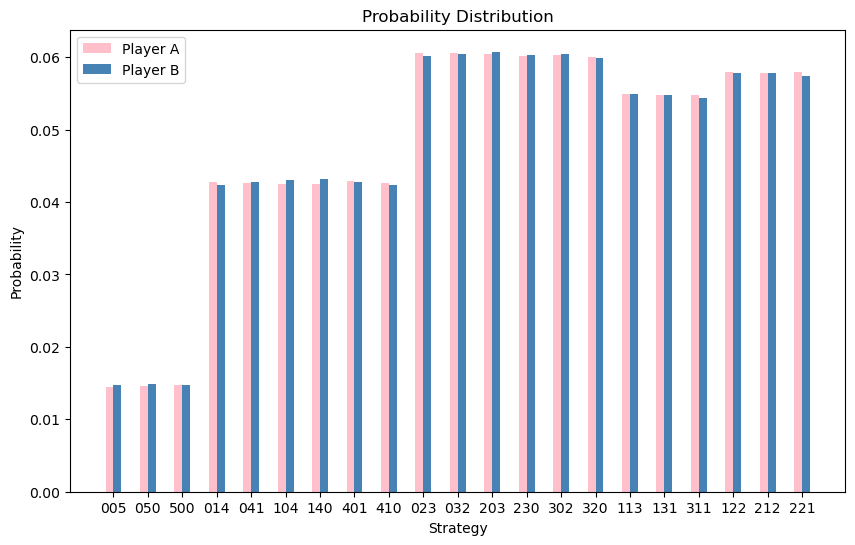

In [30]:
Prob_A = Fm1.tolist()
Prob_B = Fm2.tolist()
bar_width = 0.23
num_items = range(len(Strategy))

fig, ax = plt.subplots(figsize=(10,6))
bar1 = ax.bar(np.array(num_items) - bar_width / 2, Prob_A, bar_width, label='Player A', color='pink')
bar2 = ax.bar(np.array(num_items) + bar_width / 2, Prob_B, bar_width, label='Player B', color='steelblue')

plt.xlabel('Strategy')
plt.ylabel('Probability')
plt.title('Probability Distribution')
ax.set_xticks(num_items)
ax.set_xticklabels(Strategy)  # Set the actual item labels
ax.legend()

plt.show()

C:\Users\xinyu\AppData\Local\Temp\ipykernel_1560\1076335589.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_mapping = {combo: plt.cm.get_cmap('tab10')(i) for i, combo in enumerate(unique_combinations)}


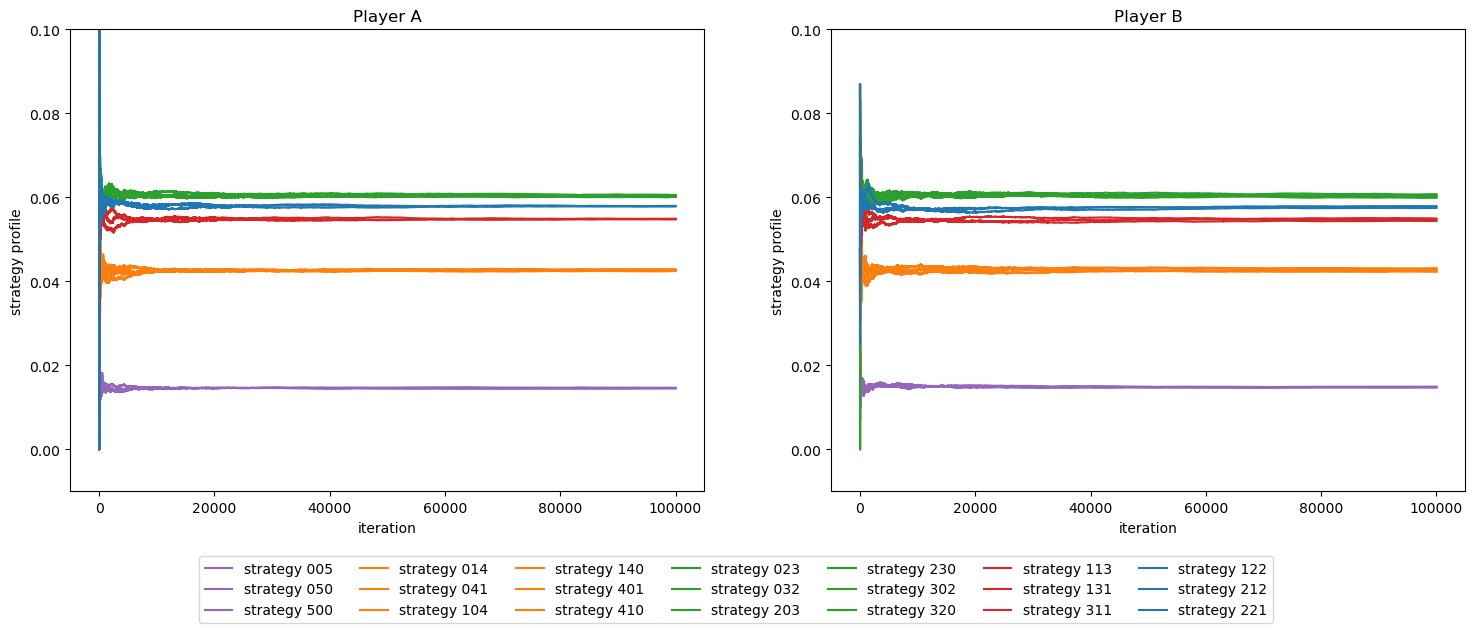

In [31]:
T = np.linspace(0,M-1,M)

# Expected = np.zeros(M) + 1/3
unique_combinations = set(''.join(sorted(s)) for s in Strategy)
color_mapping = {combo: plt.cm.get_cmap('tab10')(i) for i, combo in enumerate(unique_combinations)}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

for i in range(21):
    ax[0].plot(T, M1[:,i],label='strategy %s'%Strategy[i],color=color_mapping[''.join(sorted(Strategy[i]))])
    ax[0].set_title('Player A')
    ax[0].set_ylabel('strategy profile')
    ax[0].set_xlabel('iteration')
    ax[0].set_ylim(-0.01,0.1)
    # ax[0].legend(loc='upper right',bbox_to_anchor=(1.2, 1))

    ax[1].plot(T, M2[:,i],label='strategy %s'%Strategy[i],color=color_mapping[''.join(sorted(Strategy[i]))])
    ax[1].set_title('Player B')
    ax[1].set_ylim(-0.01,0.1)
    ax[1].set_ylabel('strategy profile')
    ax[1].set_xlabel('iteration')
    ax[1].legend(loc='lower center', bbox_to_anchor=(-0.15, -0.3), ncol=7)

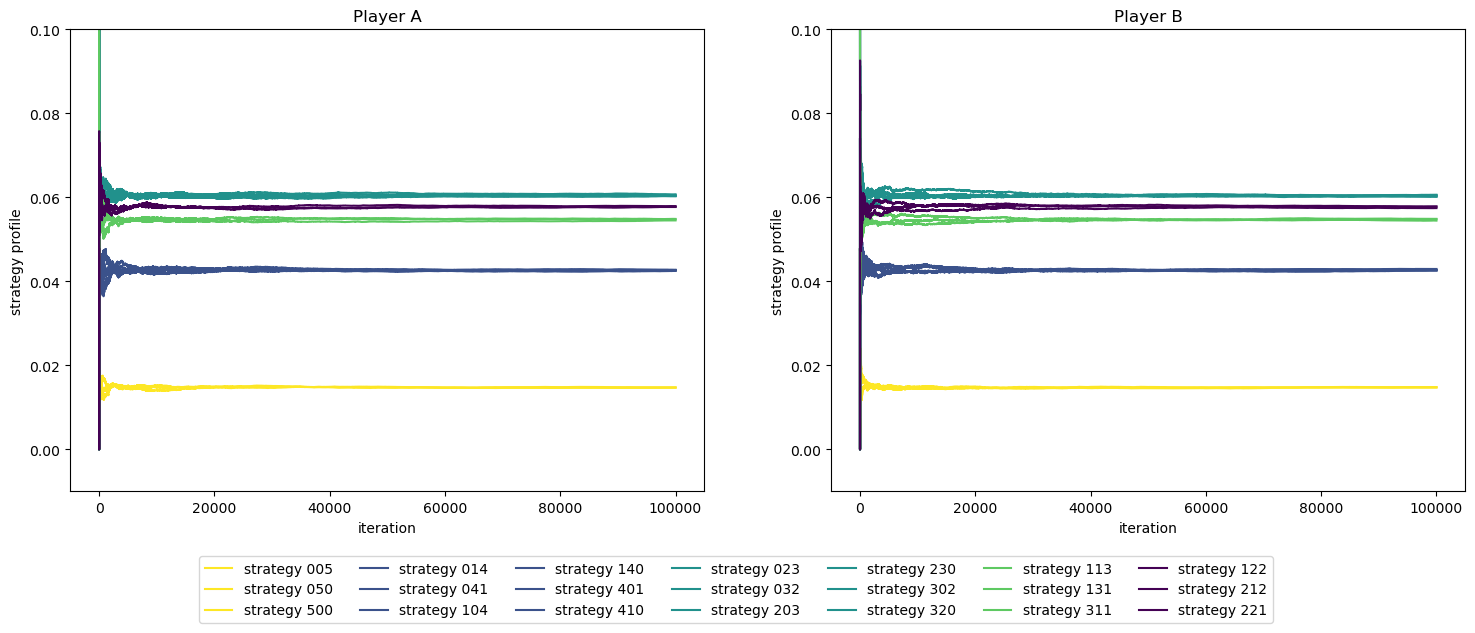

In [21]:
# T = np.linspace(0,M-1,M)

# unique_combinations = set(''.join(sorted(s)) for s in Strategy)
# cmap = plt.get_cmap('viridis', len(unique_combinations))
# color_mapping = {combo: cmap(i) for i, combo in enumerate(unique_combinations)}


# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

# for i in range(21):
#     ax[0].plot(T, M1[:,i],label='strategy %s'%Strategy[i],color=color_mapping[''.join(sorted(Strategy[i]))])
#     ax[0].set_title('Player A')
#     ax[0].set_ylabel('strategy profile')
#     ax[0].set_xlabel('iteration')
#     ax[0].set_ylim(-0.01,0.1)
#     # ax[0].legend(loc='upper right',bbox_to_anchor=(1.2, 1))

#     ax[1].plot(T, M2[:,i],label='strategy %s'%Strategy[i],color=color_mapping[''.join(sorted(Strategy[i]))])
#     ax[1].set_title('Player B')
#     ax[1].set_ylim(-0.01,0.1)
#     ax[1].set_ylabel('strategy profile')
#     ax[1].set_xlabel('iteration')
#     ax[1].legend(loc='lower center', bbox_to_anchor=(-0.15, -0.3), ncol=7)

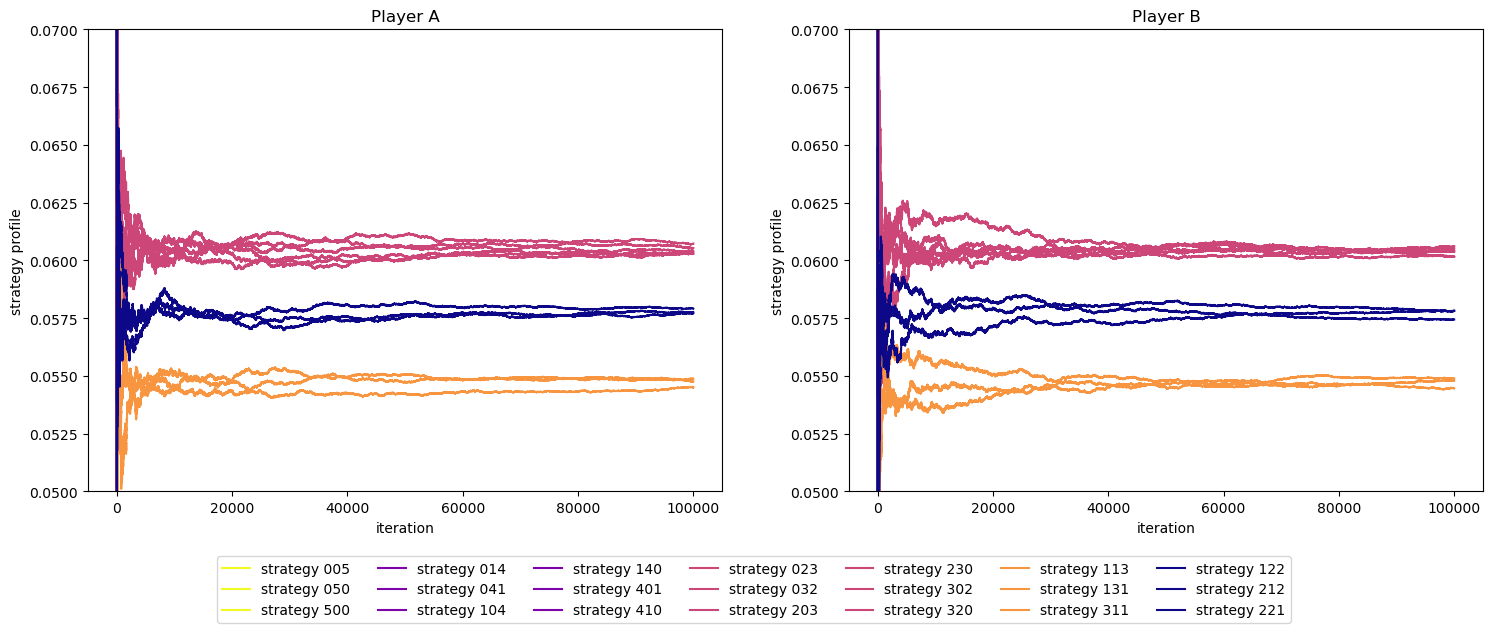

In [22]:
T = np.linspace(0,M-1,M)
# Expected = np.zeros(M) + 1/3
unique_combinations = set(''.join(sorted(s)) for s in Strategy)
cmap = plt.get_cmap('plasma', len(unique_combinations))
color_mapping = {combo: cmap(i) for i, combo in enumerate(unique_combinations)}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

for i in range(21):
    ax[0].plot(T, M1[:,i],label='strategy %s'%Strategy[i],color=color_mapping[''.join(sorted(Strategy[i]))])
    ax[0].set_title('Player A')
    ax[0].set_ylabel('strategy profile')
    ax[0].set_xlabel('iteration')
    ax[0].set_ylim(0.05,0.07)
    # ax[0].set_xlim(9000,M)
    # ax[0].legend(loc='upper right',bbox_to_anchor=(1.2, 1))

    ax[1].plot(T, M2[:,i],label='strategy %s'%Strategy[i],color=color_mapping[''.join(sorted(Strategy[i]))])
    ax[1].set_title('Player B')
    ax[1].set_ylim(0.05,0.07)
    # ax[1].set_xlim(9000,M)
    ax[1].set_ylabel('strategy profile')
    ax[1].set_xlabel('iteration')
    ax[1].legend(loc='lower center', bbox_to_anchor=(-0.15, -0.3), ncol=7)

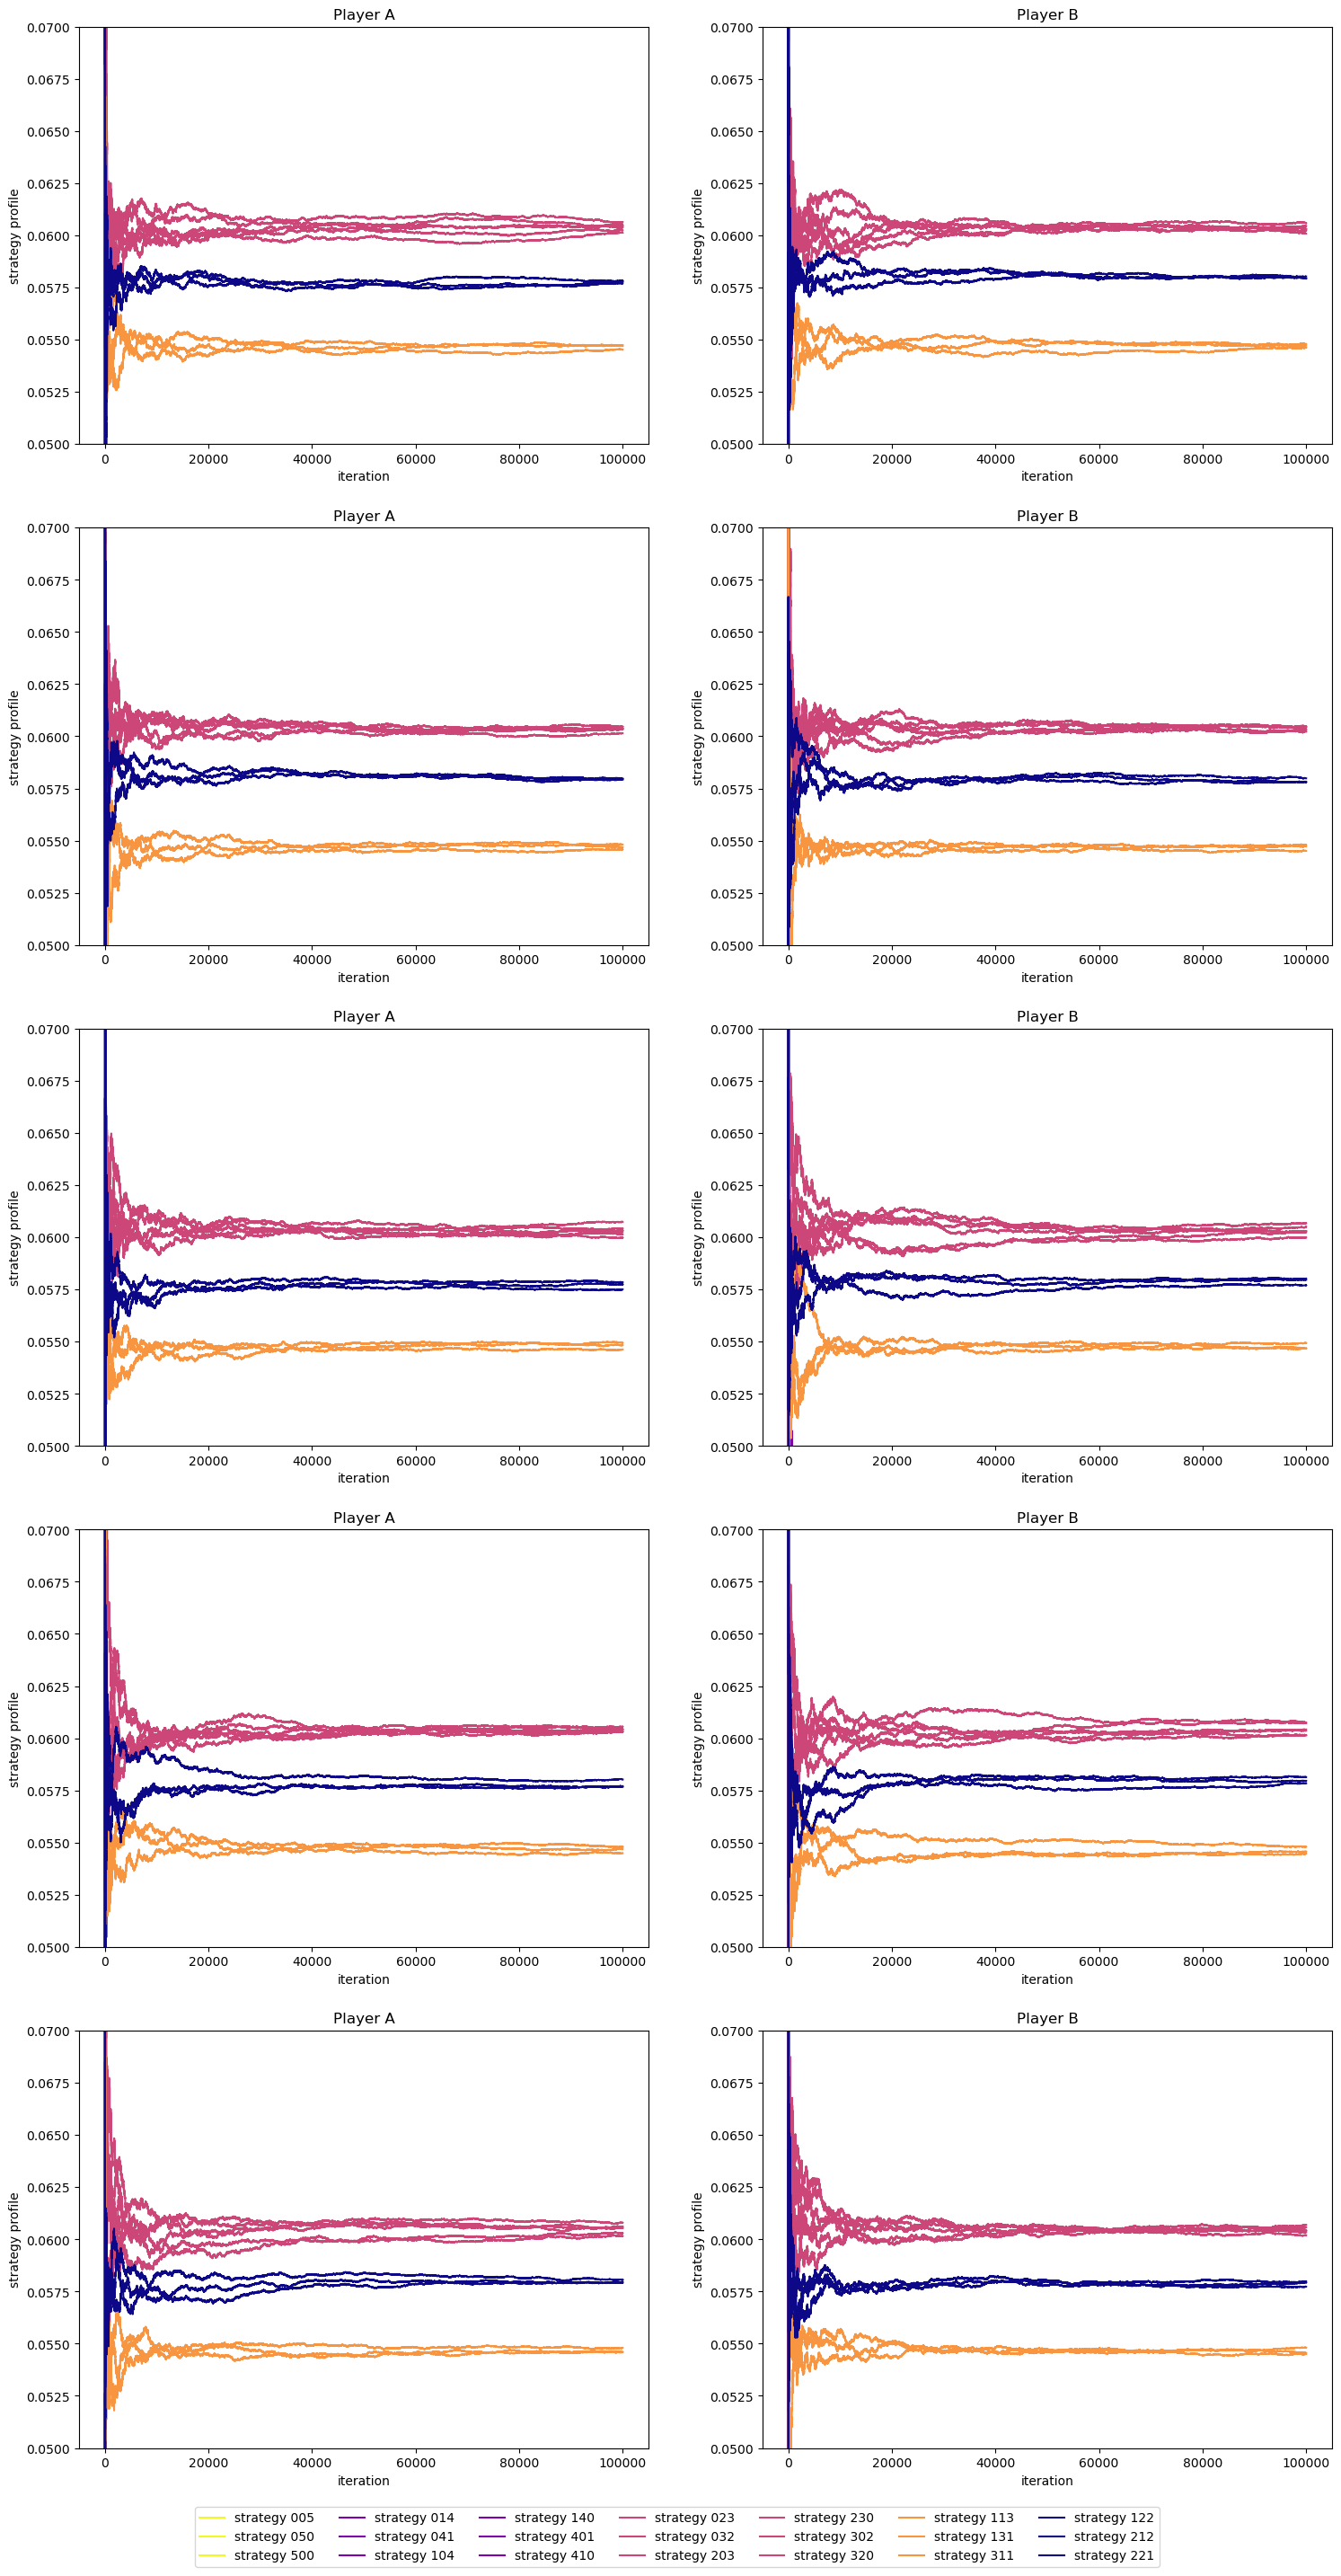

In [23]:
M = 100000
T = np.linspace(0,M-1,M)
plott = 5
fig, ax = plt.subplots(nrows=plott, ncols=2, figsize=(18,7*plott))

for j in range(plott):
    unique_combinations = set(''.join(sorted(s)) for s in Strategy)
    cmap = plt.get_cmap('plasma', len(unique_combinations))
    color_mapping = {combo: cmap(i) for i, combo in enumerate(unique_combinations)}
    
    M1, M2 = Blotto(np.zeros(21)+1/21, M)
    Fm1 = M1[-1,:]
    Fm2 = M2[-1,:]
    
    for i in range(21):
        ax[j,0].plot(T, M1[:,i],label='strategy %s'%Strategy[i],color=color_mapping[''.join(sorted(Strategy[i]))])
        ax[j,0].set_title('Player A')
        ax[j,0].set_ylabel('strategy profile')
        ax[j,0].set_xlabel('iteration')
        ax[j,0].set_ylim(0.05,0.07)
        # ax[0].set_xlim(9000,M)

        ax[j,1].plot(T, M2[:,i],label='strategy %s'%Strategy[i],color=color_mapping[''.join(sorted(Strategy[i]))])
        ax[j,1].set_title('Player B')
        ax[j,1].set_ylim(0.05,0.07)
        # ax[1].set_xlim(9000,M)
        ax[j,1].set_ylabel('strategy profile')
        ax[j,1].set_xlabel('iteration')
        
ax[plott-1,1].legend(loc='lower center', bbox_to_anchor=(-0.15, -0.3), ncol=7)

In [140]:
f_005 = np.sum(Fm1[0:3])
f_014 = np.sum(Fm1[3:9])
f_023 = np.sum(Fm1[9:15])
f_113 = np.sum(Fm1[15:18])
f_122 = np.sum(Fm1[18:])
A = [f_005,f_014,f_023,f_113,f_122]

In [141]:
F_005 = np.sum(Fm2[0:3])
F_014 = np.sum(Fm2[3:9])
F_023 = np.sum(Fm2[9:15])
F_113 = np.sum(Fm2[15:18])
F_122 = np.sum(Fm2[18:])
B = [F_005,F_014,F_023,F_113,F_122]